In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('../data/clean_data.csv', sep=',')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499992 entries, 0 to 2499991
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   label               object 
 2   url_length          int64  
 3   starts_with_ip      bool   
 4   url_entropy         float64
 5   has_punycode        bool   
 6   digit_letter_ratio  float64
 7   dot_count           int64  
 8   at_count            int64  
 9   dash_count          int64  
 10  tld_count           int64  
 11  domain_has_digits   bool   
 12  subdomain_count     int64  
 13  nan_char_entropy    float64
 14  has_internal_links  bool   
 15  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(2)
memory usage: 238.4+ MB


# Visualising the Data

### Here we visualize the length of the URLs in the dataset compared to the type of the URL (Phishing or Legitimate) 

Here we see that how longer the URL gets, the more likely it is to be a phishing URL. This is a common characteristic of phishing URLs as they tend to have longer URLs to trick users into thinking they are legitimate.

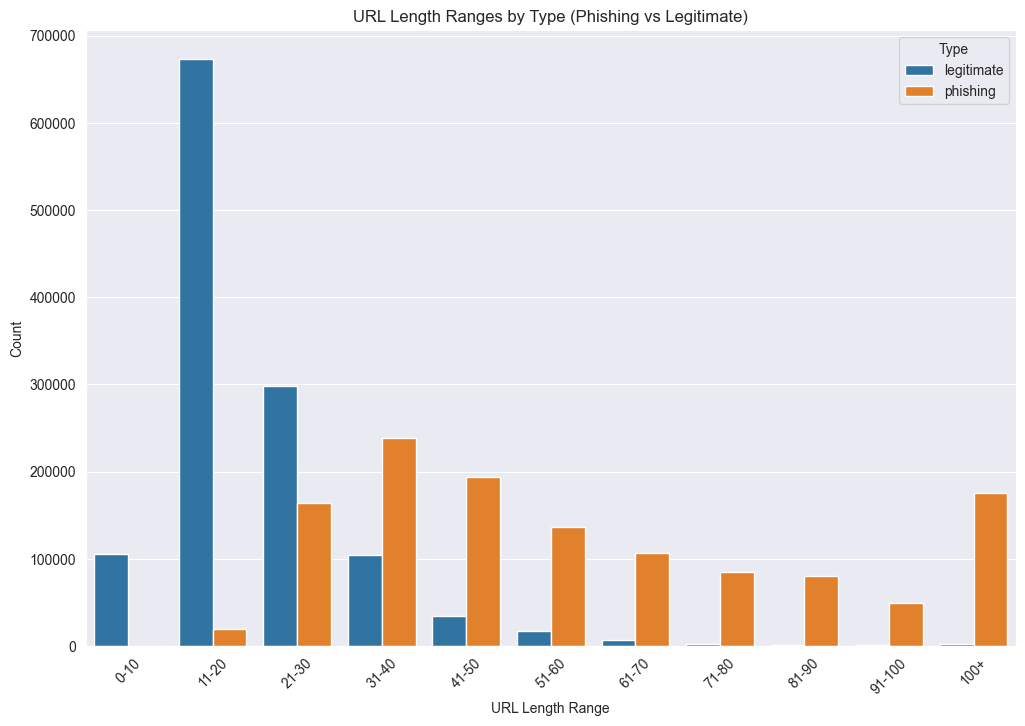

In [2]:
# Create a new column for length ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
data['length_range'] = pd.cut(data['url_length'], bins=bins, labels=labels, right=False)

# Plot the count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='length_range', hue='label', data=data)
plt.title('URL Length Ranges by Type (Phishing vs Legitimate)')
plt.xlabel('URL Length Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

### Distribution of URL Lengths

In this visualization, we explore the distribution of URL lengths in the dataset, limited to a maximum of 100 characters, and how they relate to the type of URL (Phishing or Legitimate).

The histogram displays the frequency of URLs of varying lengths, with bars representing the number of URLs within each length range. The overlaid kernel density estimate (KDE) line provides a smoothed representation of the distribution, helping to visualize the overall trend.




25523


(0.0, 100.0)

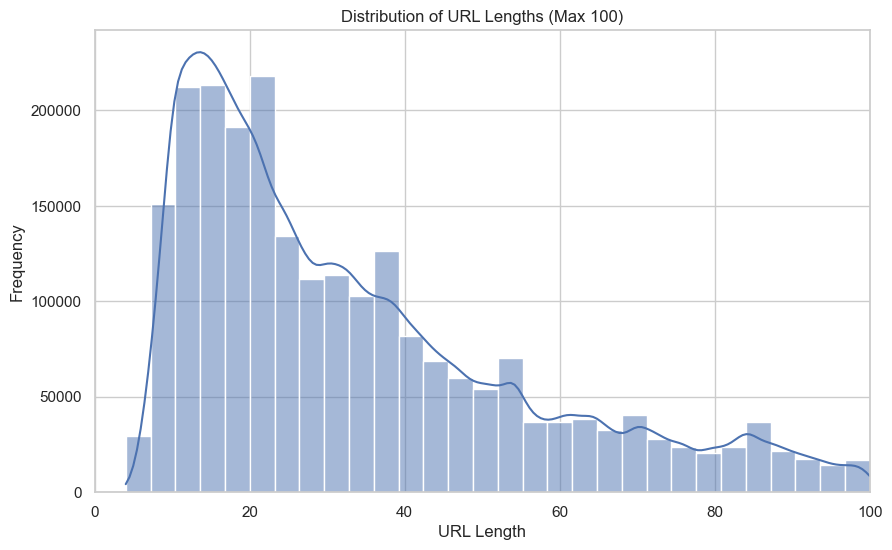

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data['url_length'].max())
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['url_length'] <= 100], x='url_length', bins=30, kde=True)  
plt.title('Distribution of URL Lengths (Max 100)')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.xlim(0, 100)  

### Count of URLs Starting with IP Address by Label

Here it is obvious that only phishing links ever start with an IP address. But the largest amount of phishing URLs do not start with an IP address.

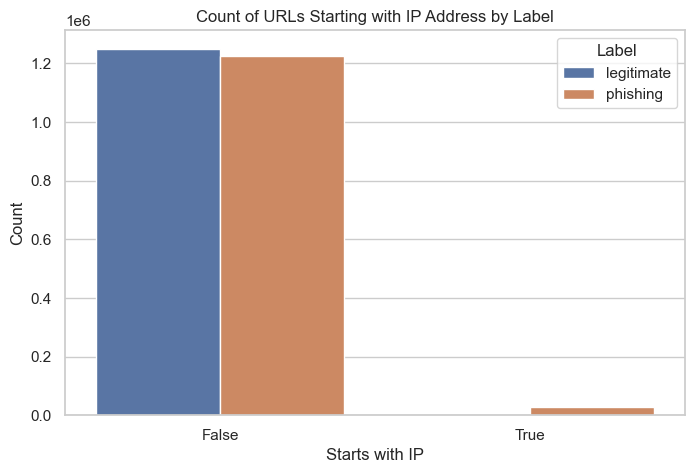

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='starts_with_ip', hue='label')
plt.title('Count of URLs Starting with IP Address by Label')
plt.xlabel('Starts with IP')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper right')
plt.show()

### Boxplot of URL Length by Label

This box plot visualizes the distribution of URL lengths categorized by their classification as either Phishing or Legitimate.


From the box plot, we can see that phishing URLs generally have longer lengths compared to legitimate URLs, as indicated by the higher median and wider spread. This trend suggests that longer URLs may be a common tactic used in phishing attempts to confuse or mislead users. Additionally, the presence of outliers on the phishing side highlights that some phishing URLs can be exceptionally long, further emphasizing the variability in their structures.


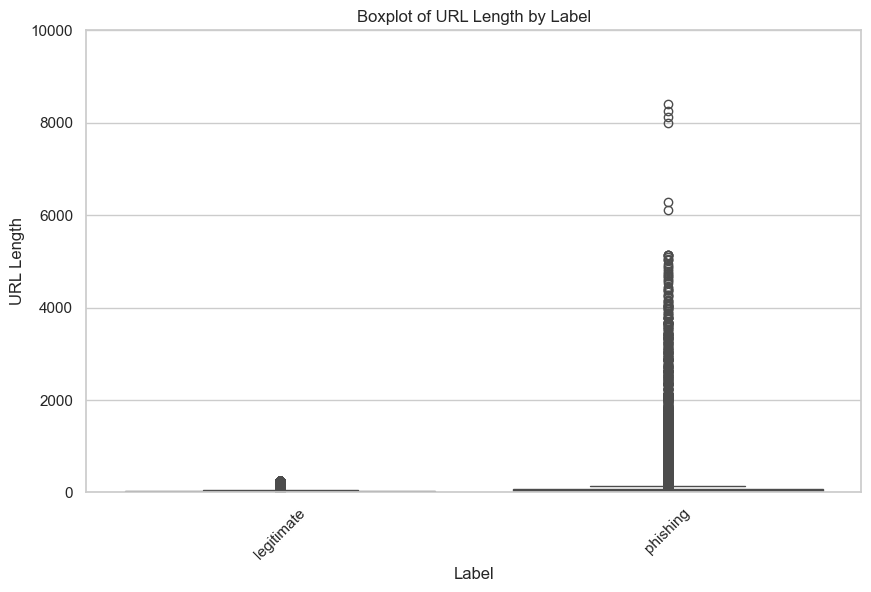

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='label', y='url_length')
plt.title('Boxplot of URL Length by Label')
plt.xlabel('Label')
plt.ylabel('URL Length')
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

### Correlation Heatmap of Numeric Features

This heatmap illustrates the correlation coefficients between various numeric features in the dataset. Each cell displays the correlation value, ranging from -1 to 1, indicating the strength and direction of the relationships between pairs of features.

The color scale, from blue to red, represents negative to positive correlations, respectively. This visualization helps identify which features are strongly correlated, providing insights into potential relationships that may influence URL classification as phishing or legitimate.


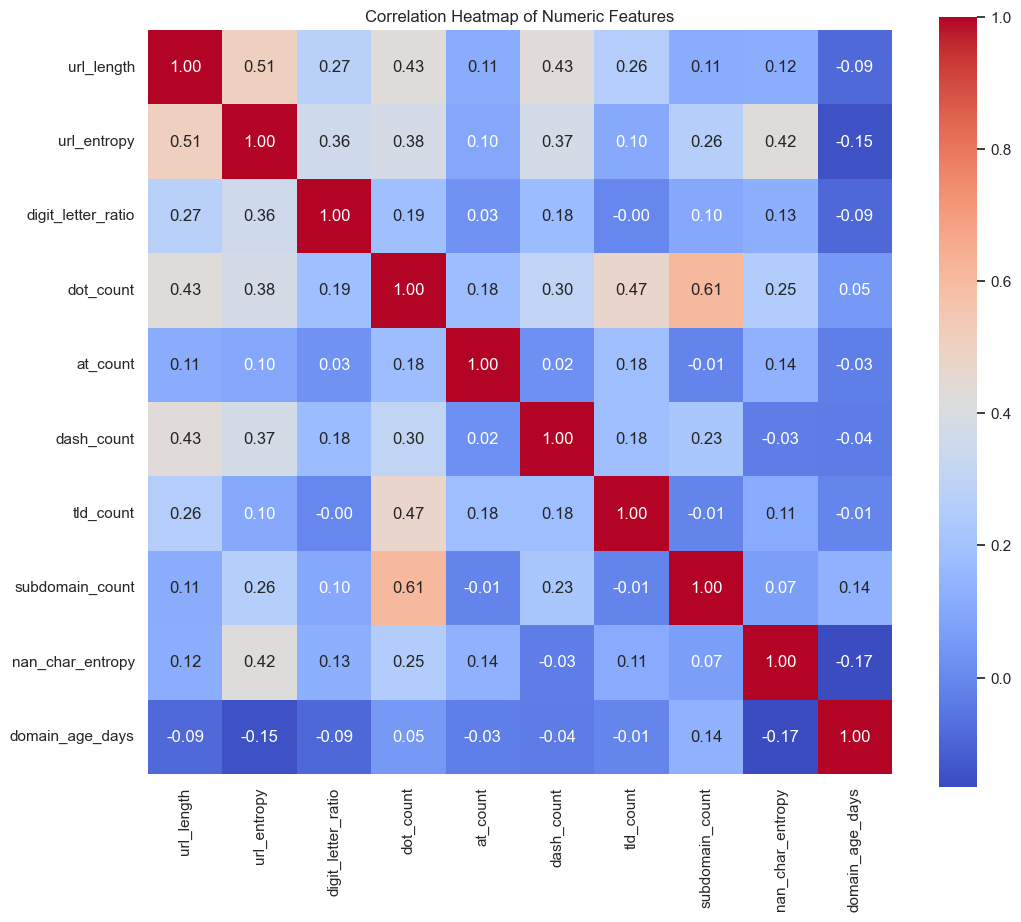

In [6]:
numeric_cols = [
    'url_length', 
    'url_entropy', 
    'digit_letter_ratio', 
    'dot_count', 
    'at_count', 
    'dash_count', 
    'tld_count', 
    'subdomain_count', 
    'nan_char_entropy', 
    'domain_age_days'
]

plt.figure(figsize=(12, 10))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()